# Analyzing Diabetes Prediction: Visuals & Model Performance



### : **Diabetes Prediction**

#### **Objective**
To predict the likelihood of diabetes in female patients based on diagnostic measurements using various machine learning models.

#### **Dataset Description**
- **Source**: National Institute of Diabetes and Digestive and Kidney Diseases (Kaggle)
- **Attributes**:
  1. **Pregnancies**: Number of times the patient has been pregnant.
  2. **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
  3. **BloodPressure**: Diastolic blood pressure (mm Hg).
  4. **SkinThickness**: Triceps skin fold thickness (mm).
  5. **Insulin**: 2-Hour serum insulin (mu U/ml).
  6. **BMI**: Body mass index (weight in kg/(height in m)^2).
  7. **DiabetesPedigreeFunction**: A function representing the genetic influence of diabetes.
  8. **Age**: Patient's age in years.
  9. **Outcome**: The target class (1 = diabetes, 0 = no diabetes).
  
  - **Number of Instances**: 768
  - **Number of Attributes**: 8 features + 1 target variable (Outcome)

==

In [99]:
#import paskages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, accuracy_score , recall_score , f1_score , classification_report
from sklearn.model_selection import train_test_split



In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
plt.style.use('ggplot')

### Explore data

In [13]:
#load dataset
data_diabetes = pd.read_csv("dataset/diabetes.csv")

In [14]:
#head dataset
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#last dataset rows
data_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
#information about dataset
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# Summary statistics for numerical features
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#check is null data
data_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
#check is duplicated data rows
data_diabetes.duplicated().sum()

0

### Analysis 

In [28]:
#correlation dataset 
corr_data= data_diabetes.corr()
corr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [29]:
#correlation dataset with target Outcome column
corr_target= data_diabetes.corr().drop(['Outcome'])['Outcome']
corr_target

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

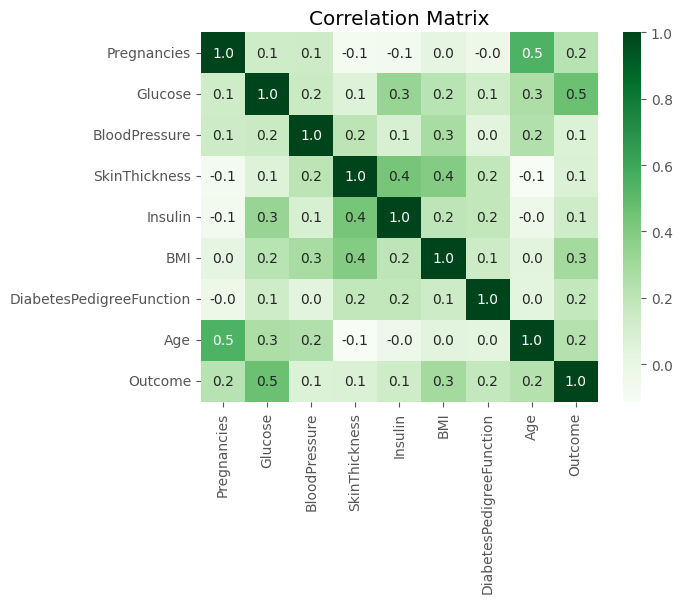

In [47]:
#plot correaltion matrix 
sns.heatmap(corr_data , annot=True ,cmap='Greens', fmt='.1f')
plt.title('Correlation Matrix')

plt.show()


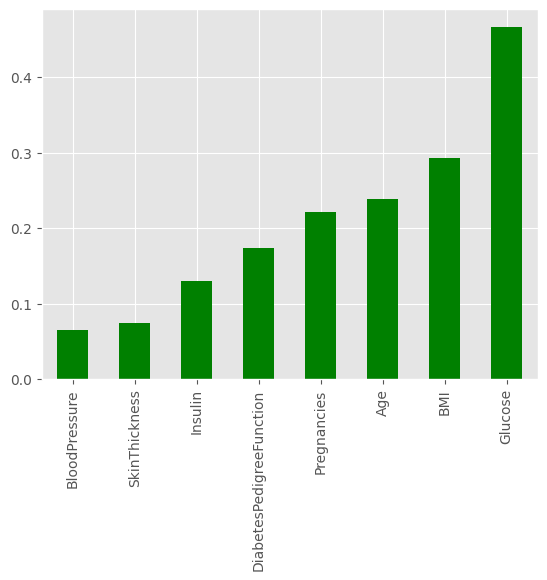

In [46]:
#  correlation with "Outcome"

corr_target.sort_values().plot(kind='bar',color='green')
plt.show()

Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

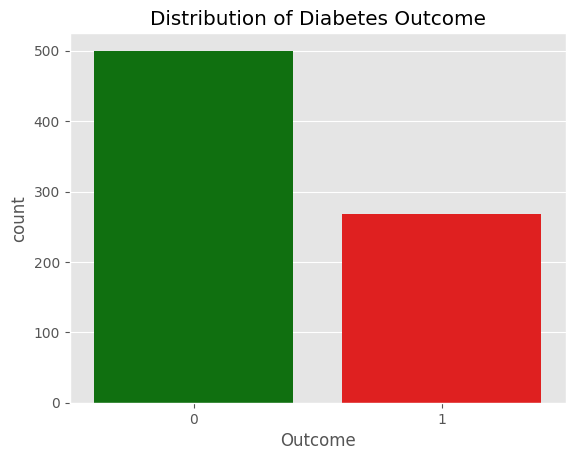

In [55]:
# visalization count plot "Outcome"
sns.countplot(x='Outcome', data=data_diabetes,palette=['g','r'])
plt.title('Distribution of Diabetes Outcome')


<Axes: xlabel='Age'>

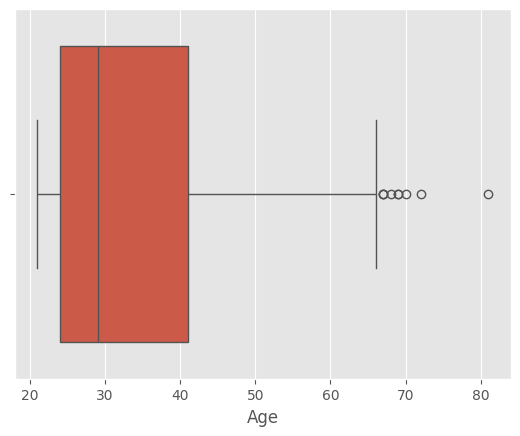

In [59]:
#visalization boxplot
sns.boxplot(x='Age',data=data_diabetes)

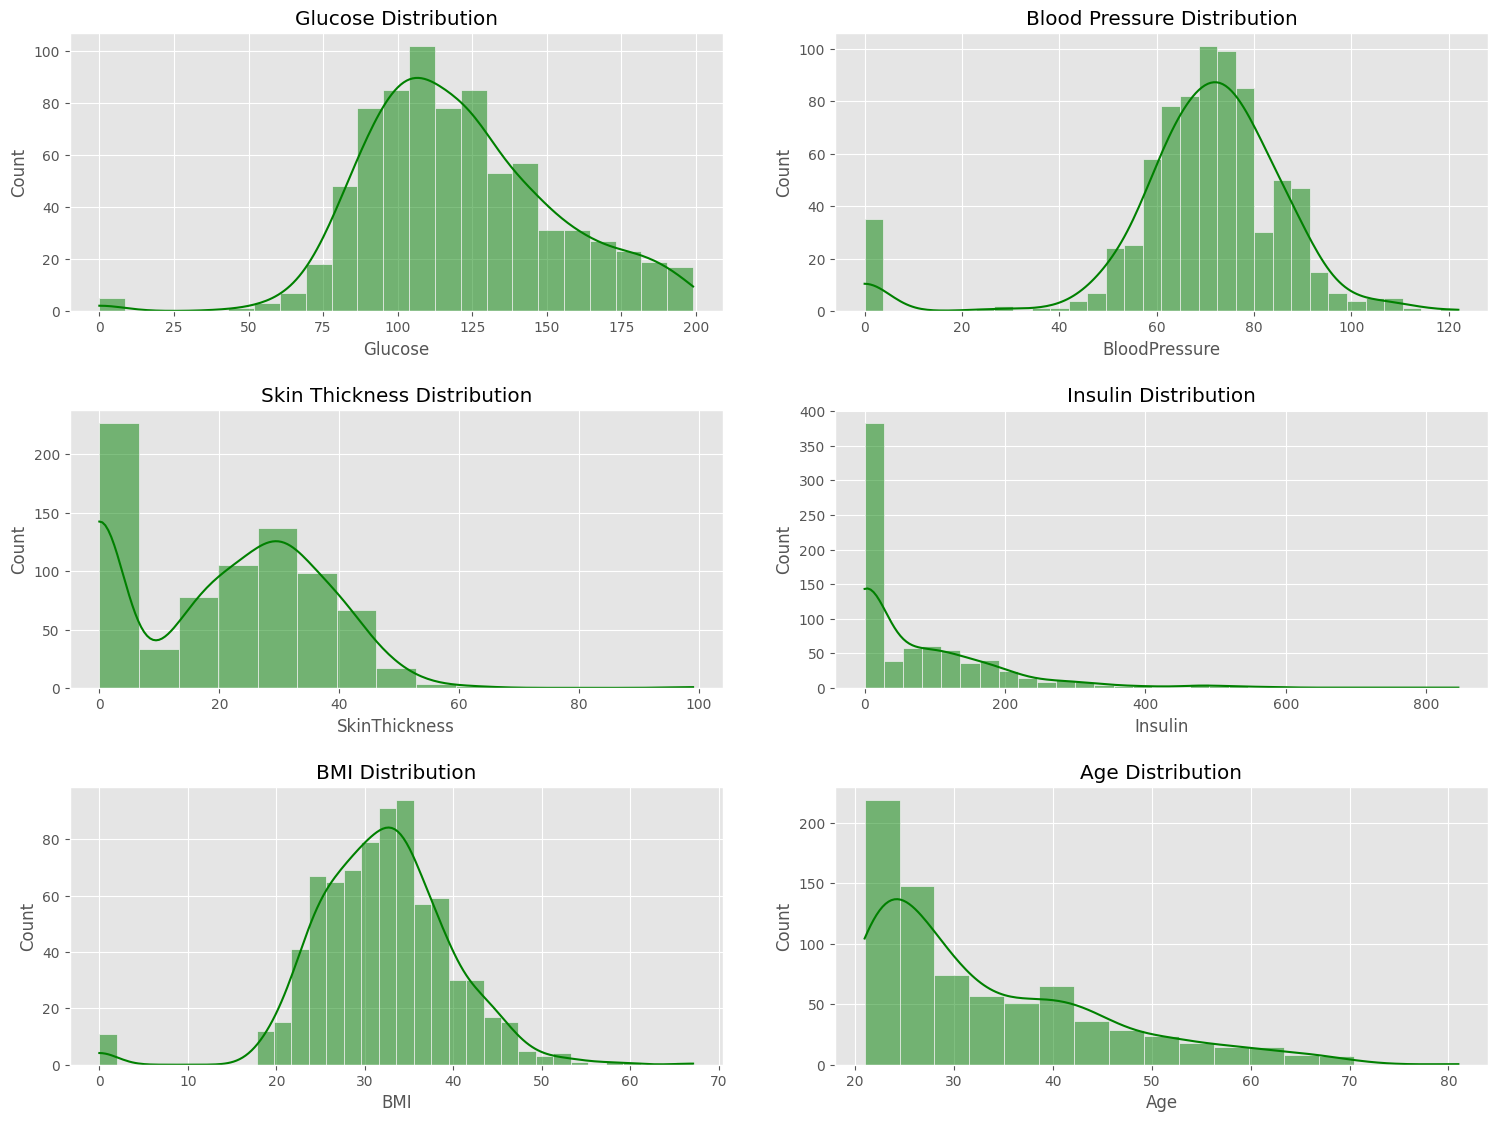

In [61]:
# Plot histograms and KDE for continuous features
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.tight_layout(pad=5.0)

sns.histplot(data_diabetes['Glucose'], kde=True, ax=axes[0, 0], color='green').set(title='Glucose Distribution')
sns.histplot(data_diabetes['BloodPressure'], kde=True, ax=axes[0, 1], color='green').set(title='Blood Pressure Distribution')
sns.histplot(data_diabetes['SkinThickness'], kde=True, ax=axes[1, 0], color='green').set(title='Skin Thickness Distribution')
sns.histplot(data_diabetes['Insulin'], kde=True, ax=axes[1, 1], color='green').set(title='Insulin Distribution')
sns.histplot(data_diabetes['BMI'], kde=True, ax=axes[2, 0], color='green').set(title='BMI Distribution')
sns.histplot(data_diabetes['Age'], kde=True, ax=axes[2, 1], color='green').set(title='Age Distribution')

plt.show()


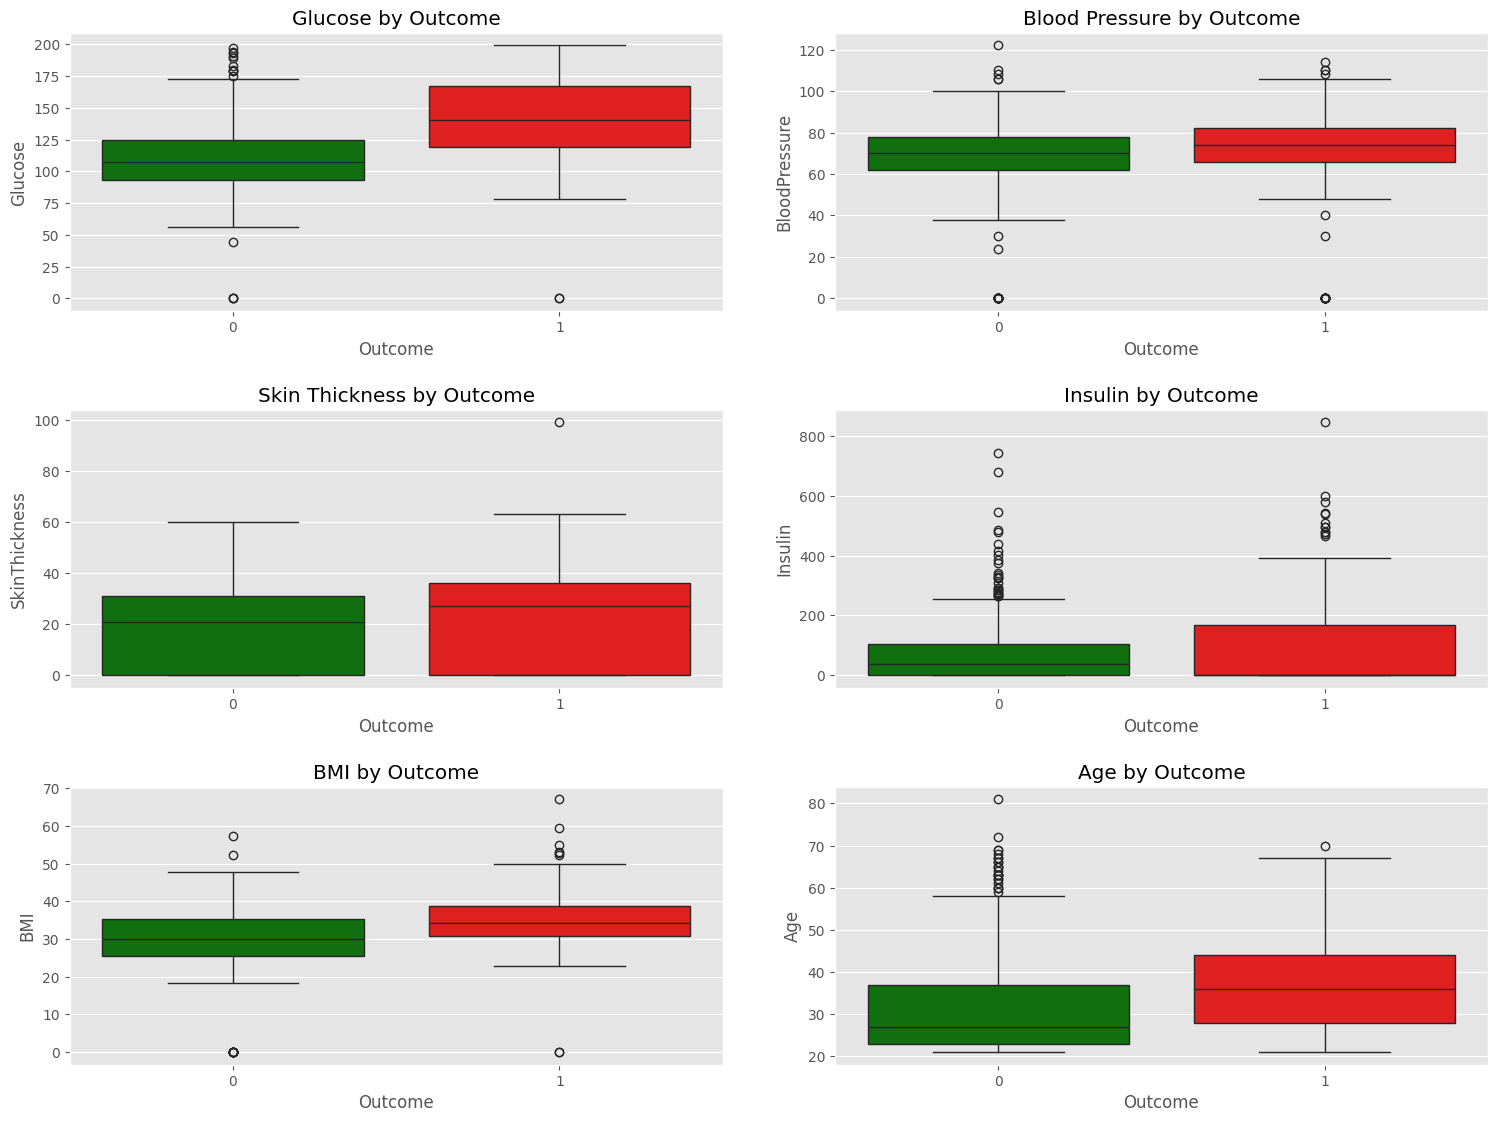

In [62]:
# Box plots for detecting outliers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.tight_layout(pad=5.0)

sns.boxplot(x='Outcome', y='Glucose', data=data_diabetes, ax=axes[0, 0], palette=['green', 'red']).set(title='Glucose by Outcome')
sns.boxplot(x='Outcome', y='BloodPressure', data=data_diabetes, ax=axes[0, 1], palette=['green', 'red']).set(title='Blood Pressure by Outcome')
sns.boxplot(x='Outcome', y='SkinThickness', data=data_diabetes, ax=axes[1, 0], palette=['green', 'red']).set(title='Skin Thickness by Outcome')
sns.boxplot(x='Outcome', y='Insulin', data=data_diabetes, ax=axes[1, 1], palette=['green', 'red']).set(title='Insulin by Outcome')
sns.boxplot(x='Outcome', y='BMI', data=data_diabetes, ax=axes[2, 0], palette=['green', 'red']).set(title='BMI by Outcome')
sns.boxplot(x='Outcome', y='Age', data=data_diabetes, ax=axes[2, 1], palette=['green', 'red']).set(title='Age by Outcome')

plt.show()


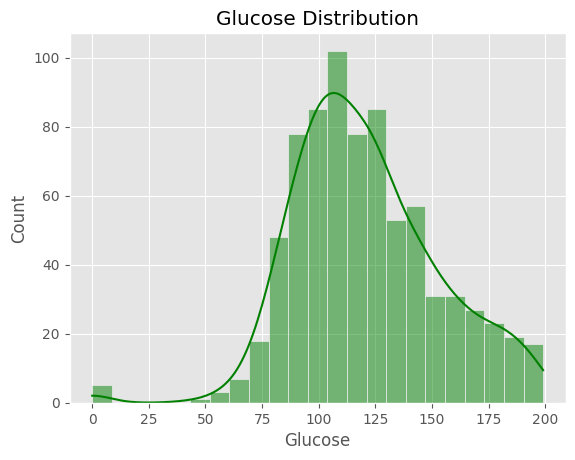

In [64]:
# Histogram and KDE for Glucose
sns.histplot(data_diabetes['Glucose'], kde=True, color='green')
plt.title('Glucose Distribution')
plt.show()


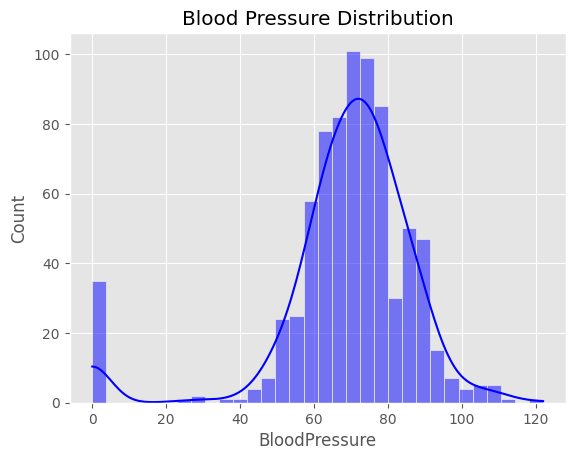

In [65]:
# Histogram and KDE for Blood Pressure
sns.histplot(data_diabetes['BloodPressure'], kde=True, color='blue')
plt.title('Blood Pressure Distribution')
plt.show()

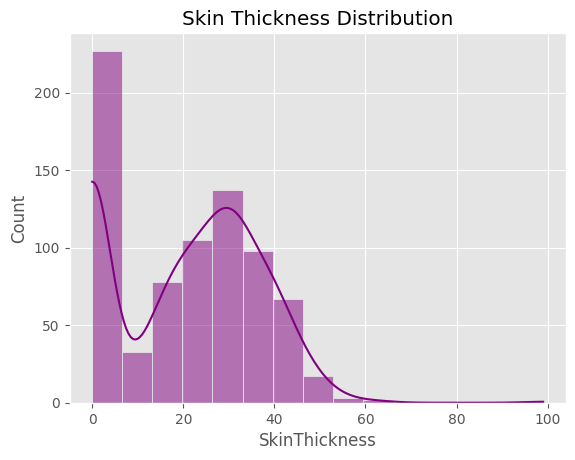

In [66]:
# Histogram and KDE for Skin Thickness
sns.histplot(data_diabetes['SkinThickness'], kde=True, color='purple')
plt.title('Skin Thickness Distribution')
plt.show()

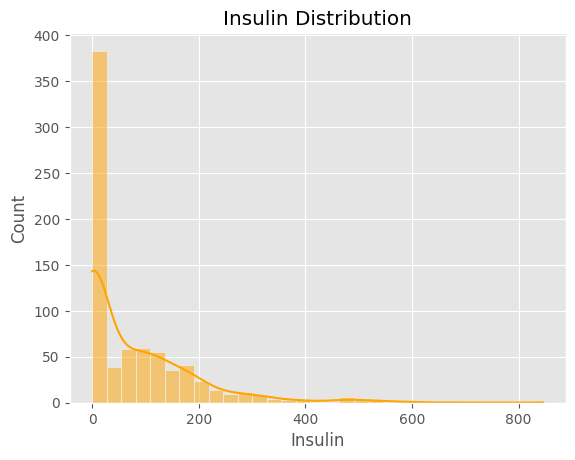

In [67]:
# Histogram and KDE for Insulin
sns.histplot(data_diabetes['Insulin'], kde=True, color='orange')
plt.title('Insulin Distribution')
plt.show()

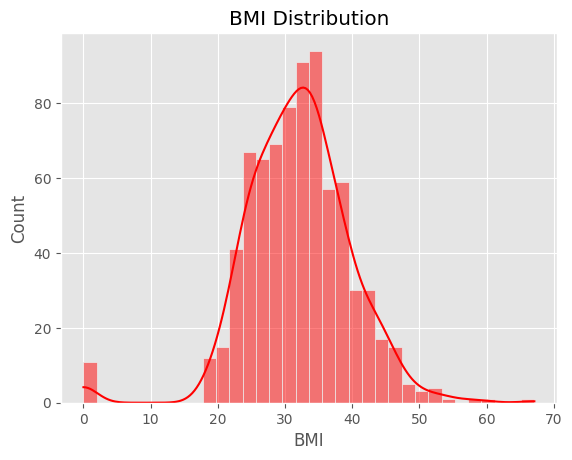

In [68]:
# Histogram for BMI
sns.histplot(data_diabetes['BMI'], kde=True, color='red')
plt.title('BMI Distribution')
plt.show()


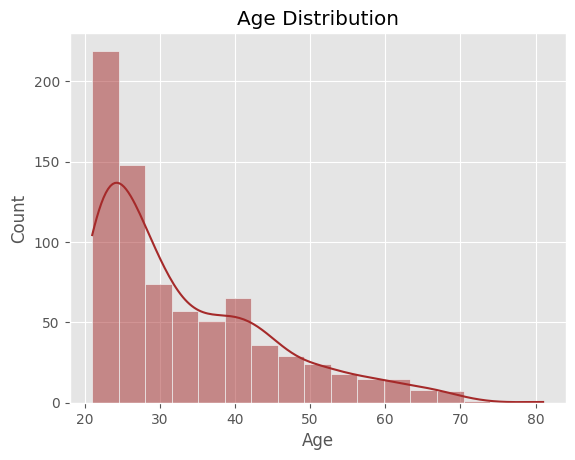

In [69]:
# Histogram  for Age
sns.histplot(data_diabetes['Age'], kde=True, color='brown')
plt.title('Age Distribution')
plt.show()

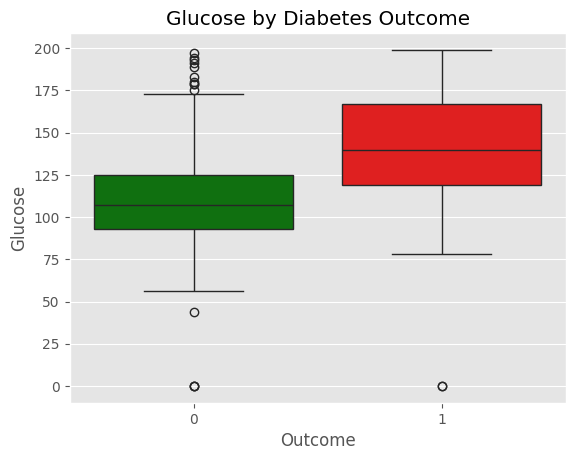

In [70]:
# Box plot for Glucose by Outcome
sns.boxplot(x='Outcome', y='Glucose', data=data_diabetes, palette=['green', 'red'])
plt.title('Glucose by Diabetes Outcome')
plt.show()

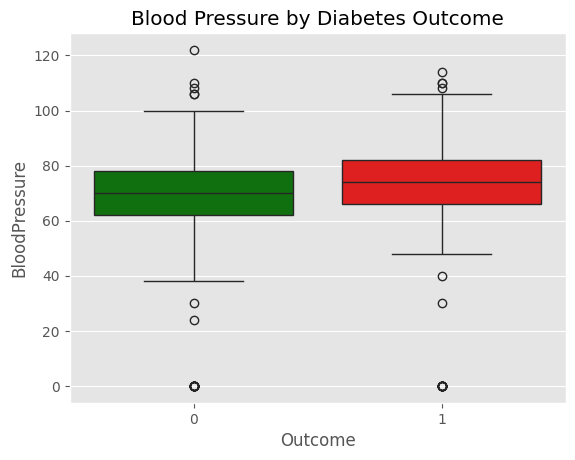

In [71]:

# Box plot for Blood Pressure by Outcome
sns.boxplot(x='Outcome', y='BloodPressure', data=data_diabetes, palette=['green', 'red'])
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()

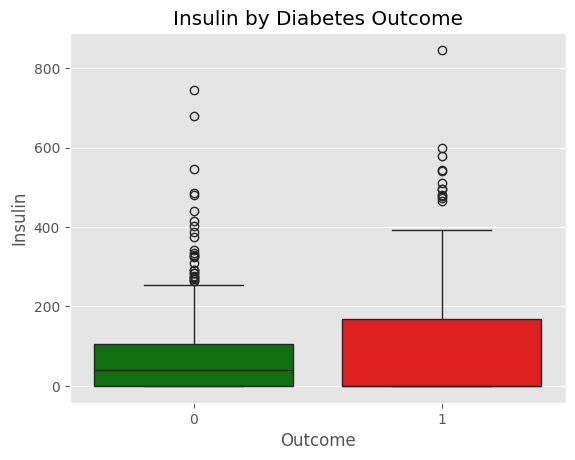

In [72]:
# Box plot for Insulin by Outcome
sns.boxplot(x='Outcome', y='Insulin', data=data_diabetes, palette=['green', 'red'])
plt.title('Insulin by Diabetes Outcome')
plt.show()

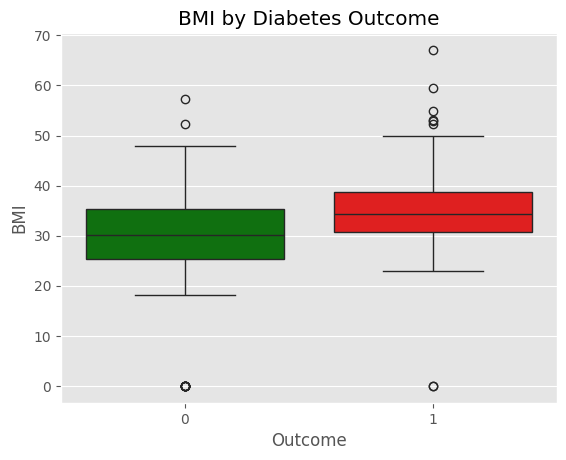

In [73]:
# Box plot for BMI by Outcome
sns.boxplot(x='Outcome', y='BMI', data=data_diabetes, palette=['green', 'red'])
plt.title('BMI by Diabetes Outcome')
plt.show()

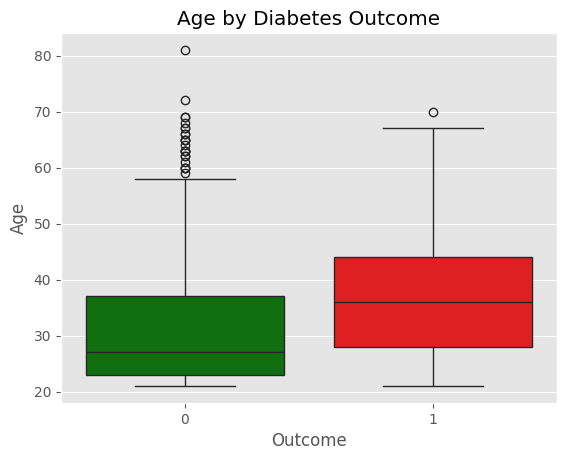

In [74]:
# Box plot for Age by Outcome
sns.boxplot(x='Outcome', y='Age', data=data_diabetes, palette=['green', 'red'])
plt.title('Age by Diabetes Outcome')
plt.show()

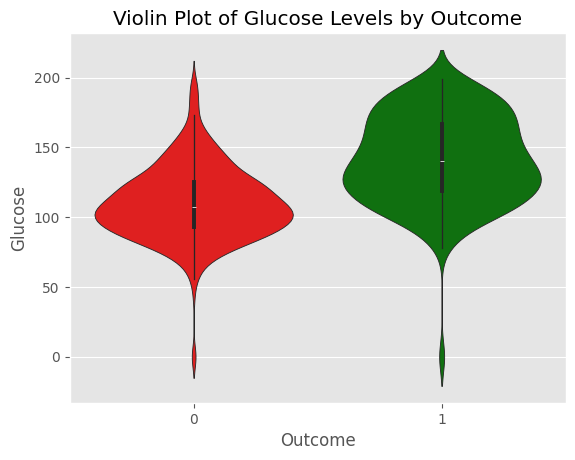

In [78]:
# Violin Plot
#plt.figure(figsize=(12, 8))
sns.violinplot(x='Outcome', y='Glucose', data=data_diabetes, palette=['r', 'g'])
plt.title('Violin Plot of Glucose Levels by Outcome')
plt.show()


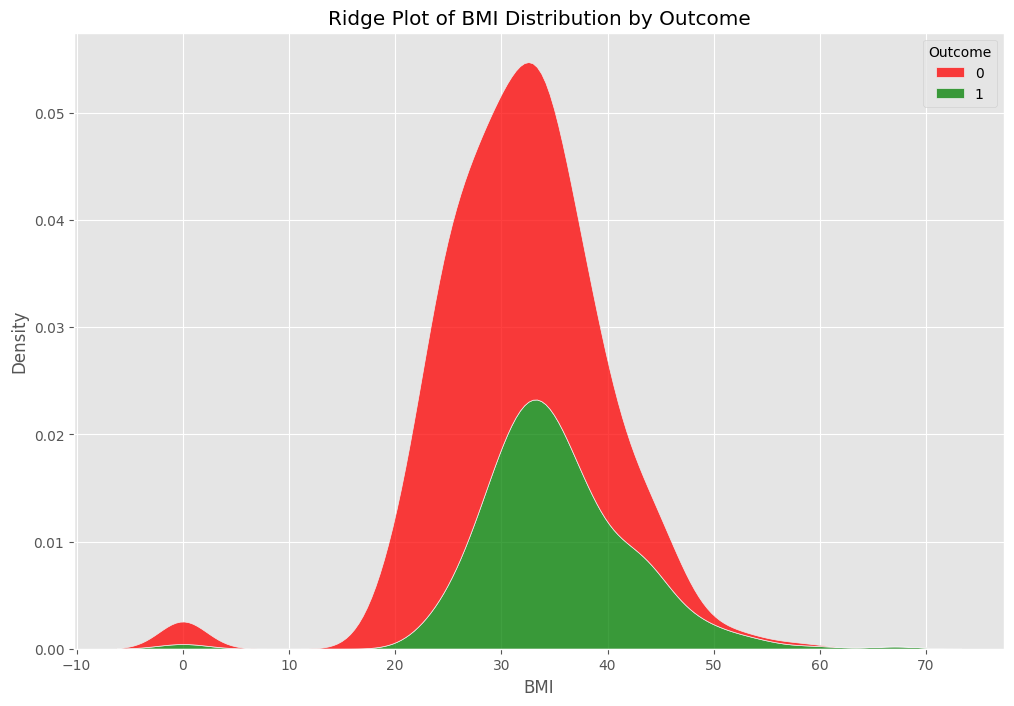

In [82]:
# Ridge Plot  for BMI distribution
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data_diabetes, x='BMI', hue='Outcome', multiple='stack', palette=['r', 'g'])
plt.title('Ridge Plot of BMI Distribution by Outcome')
plt.show()

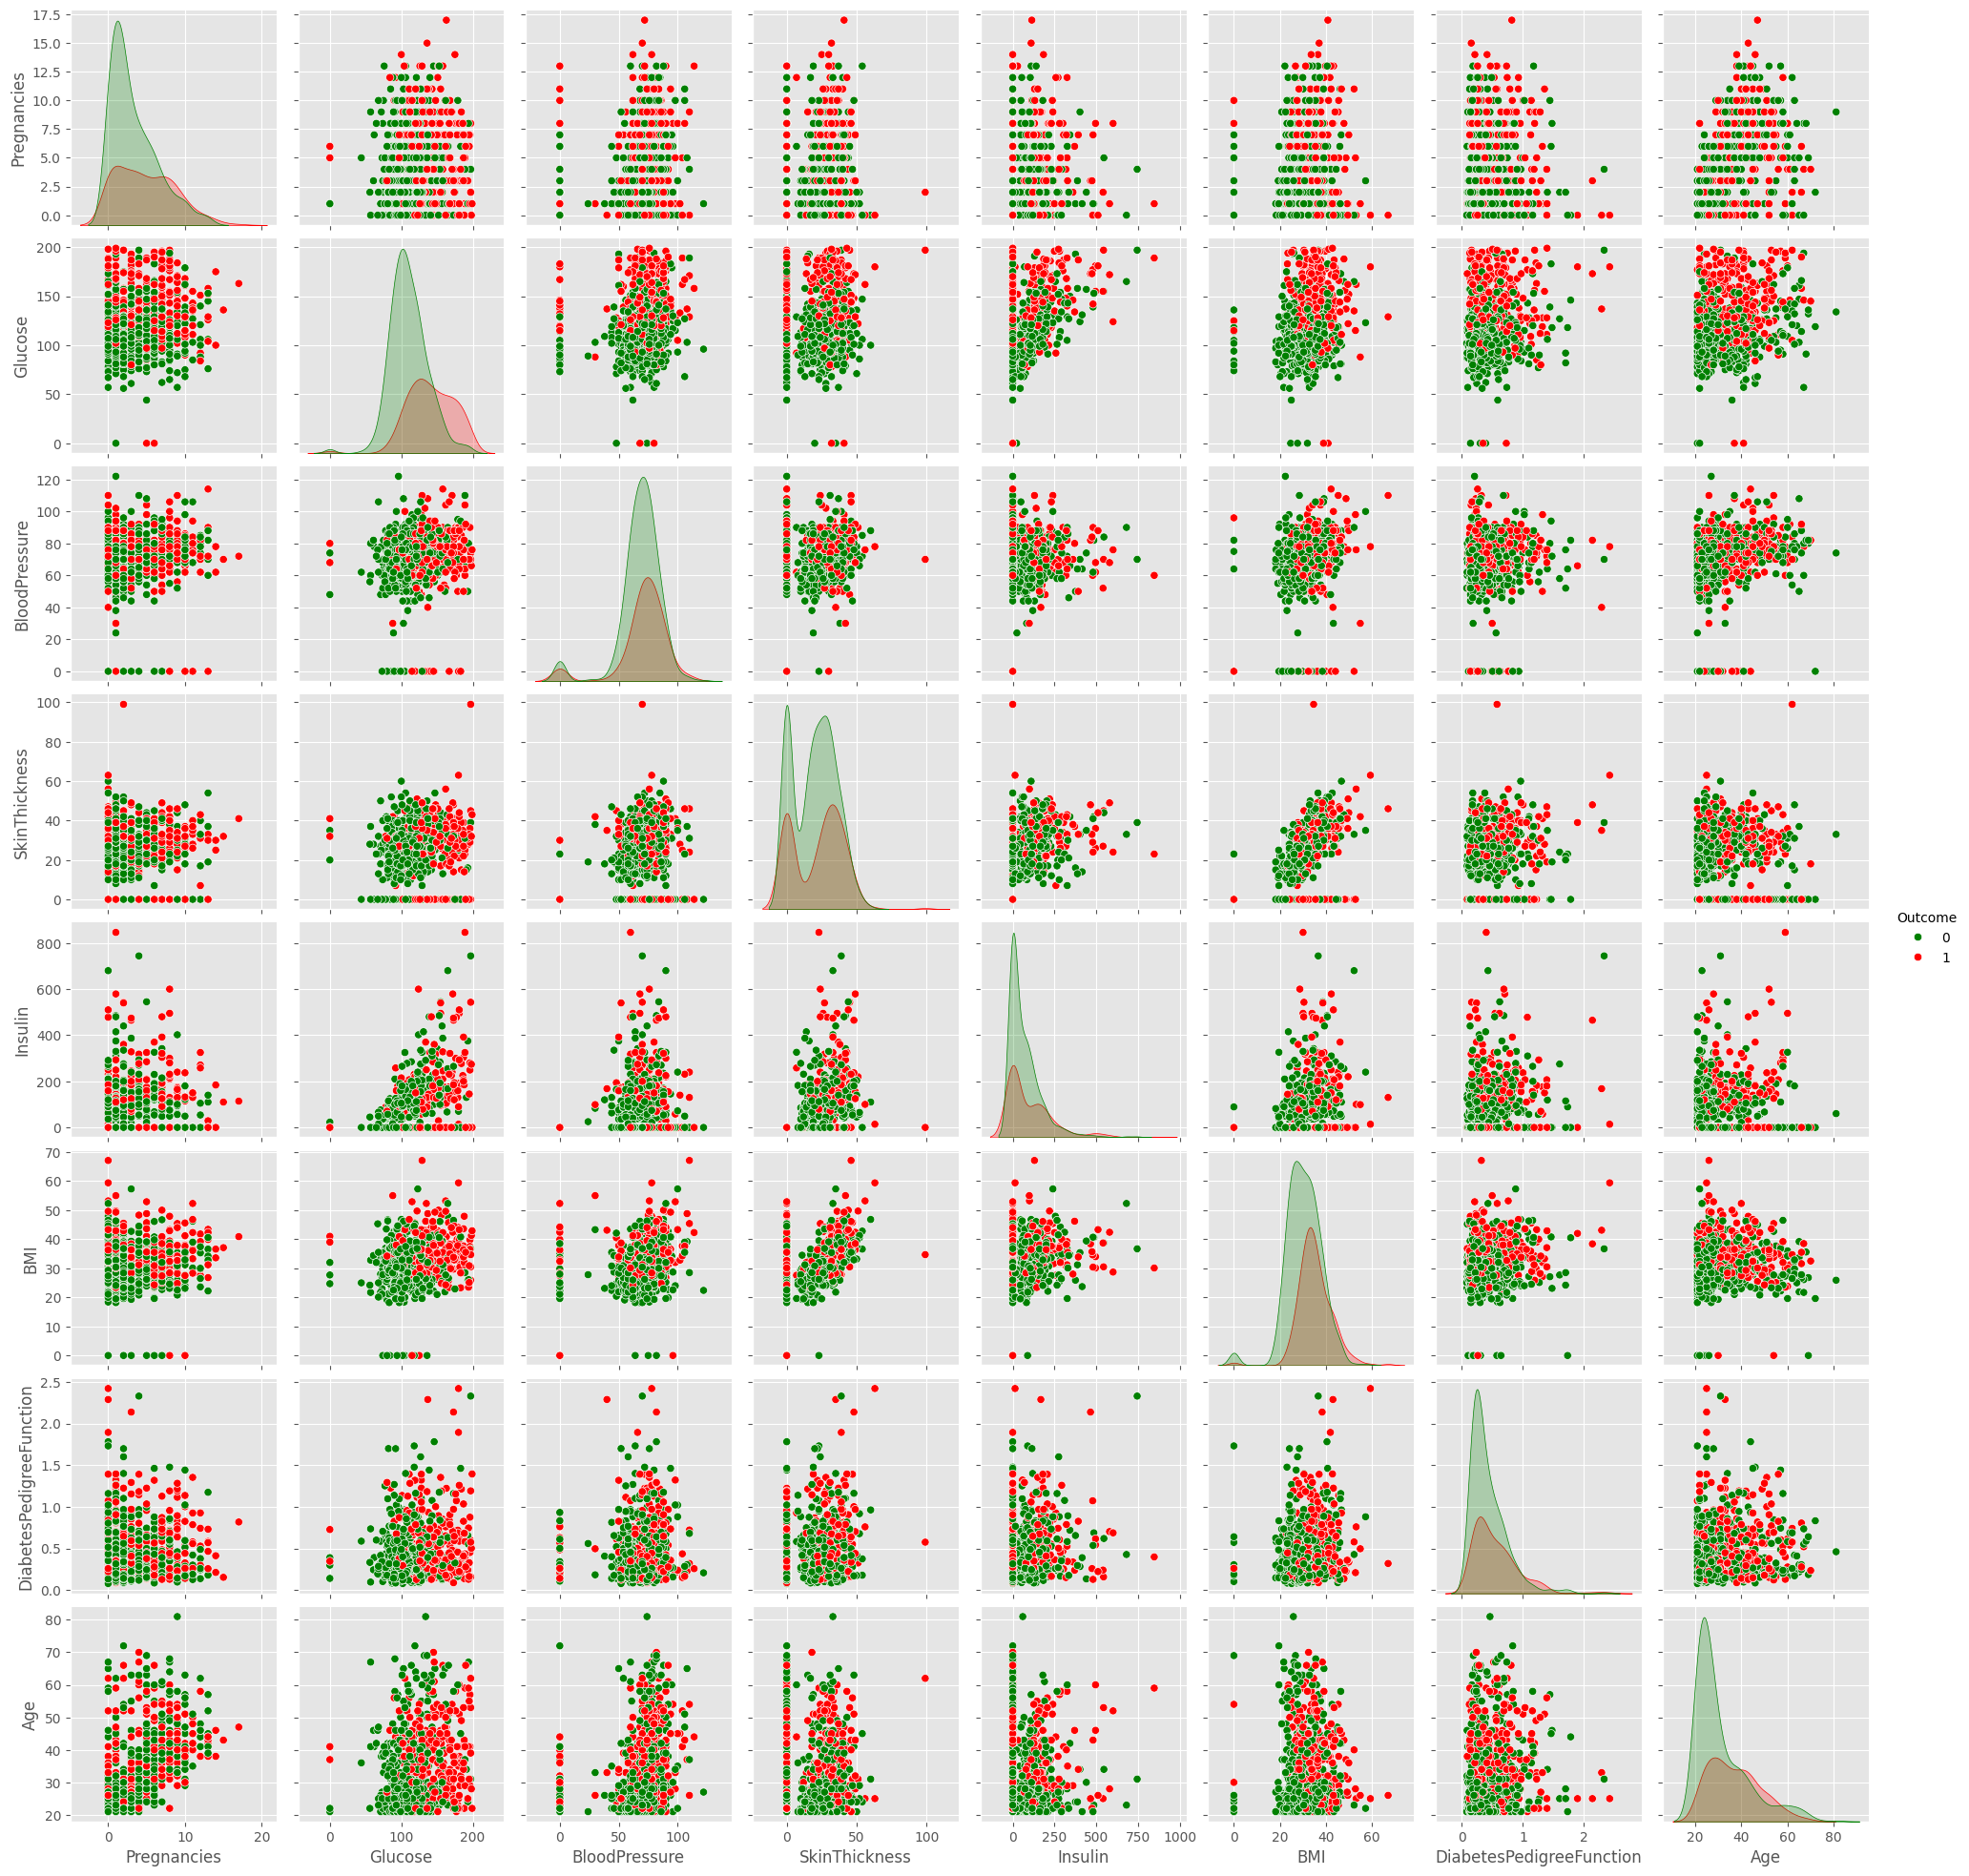

In [76]:
# Pair plot to visualize relationships between features and outcome
sns.pairplot(data_diabetes, hue='Outcome', palette={0: 'green', 1: 'red'})
plt.show()


### Modeling 

In [83]:
# Split data into features and target variable
X = data_diabetes.drop(columns='Outcome')
y = data_diabetes['Outcome']

In [84]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###### Train each model and compute performance metrics.



In [90]:
#models 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [93]:
# dictionaries to store performance metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'F1 Score': []
}

In [94]:
# Train and evaluate each model
for name,model in models.items():
    model.fit(X_train , y_train)
    y_pred= model.predict(X_test)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))

In [95]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Recall,F1 Score
0,Logistic Regression,0.701299,0.666667,0.610169
1,SVM,0.766234,0.592593,0.640000
2,Random Forest,0.727273,0.666667,0.631579
3,Gradient Boosting,0.727273,0.740741,0.655738
4,AdaBoost,0.753247,0.666667,0.654545
5,K-Nearest Neighbors,0.649351,0.555556,0.526316
6,Naive Bayes,0.701299,0.703704,0.622951


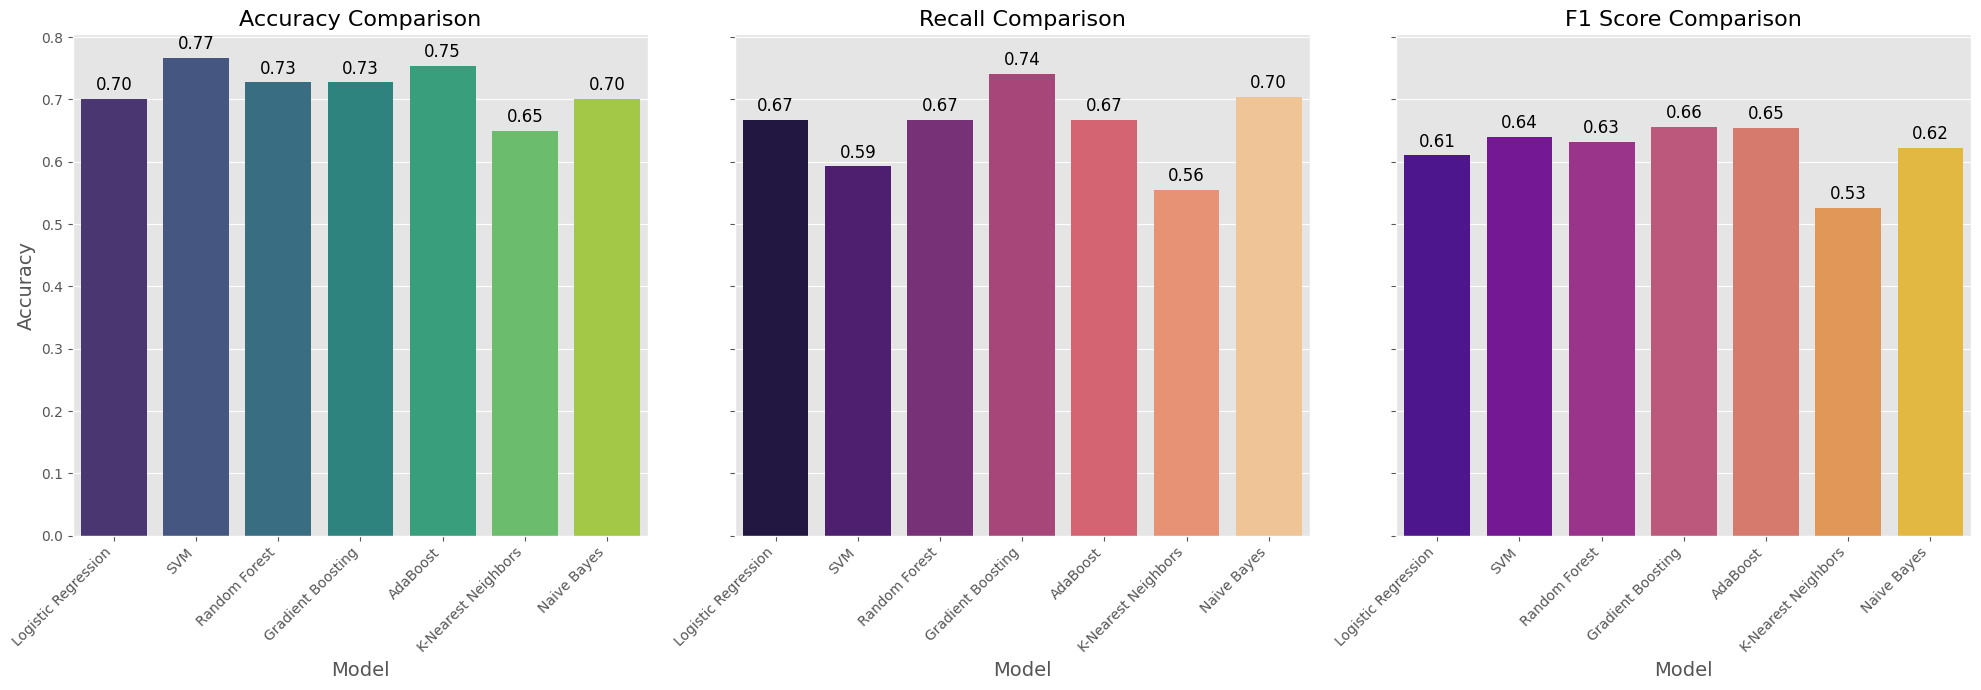

In [102]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', ax=axes[0])
axes[0].set_title('Accuracy Comparison', fontsize=16)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].set_xlabel('Model', fontsize=14)

# Plot Recall
sns.barplot(x='Model', y='Recall', data=results_df, palette='magma', ax=axes[1])
axes[1].set_title('Recall Comparison', fontsize=16)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].set_ylabel('Recall', fontsize=14)
axes[1].set_xlabel('Model', fontsize=14)

# Plot F1 Score
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='plasma', ax=axes[2])
axes[2].set_title('F1 Score Comparison', fontsize=16)
axes[2].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[2].set_ylabel('F1 Score', fontsize=14)
axes[2].set_xlabel('Model', fontsize=14)

# Add value annotations on bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


###### Confusion Matrix Comparison

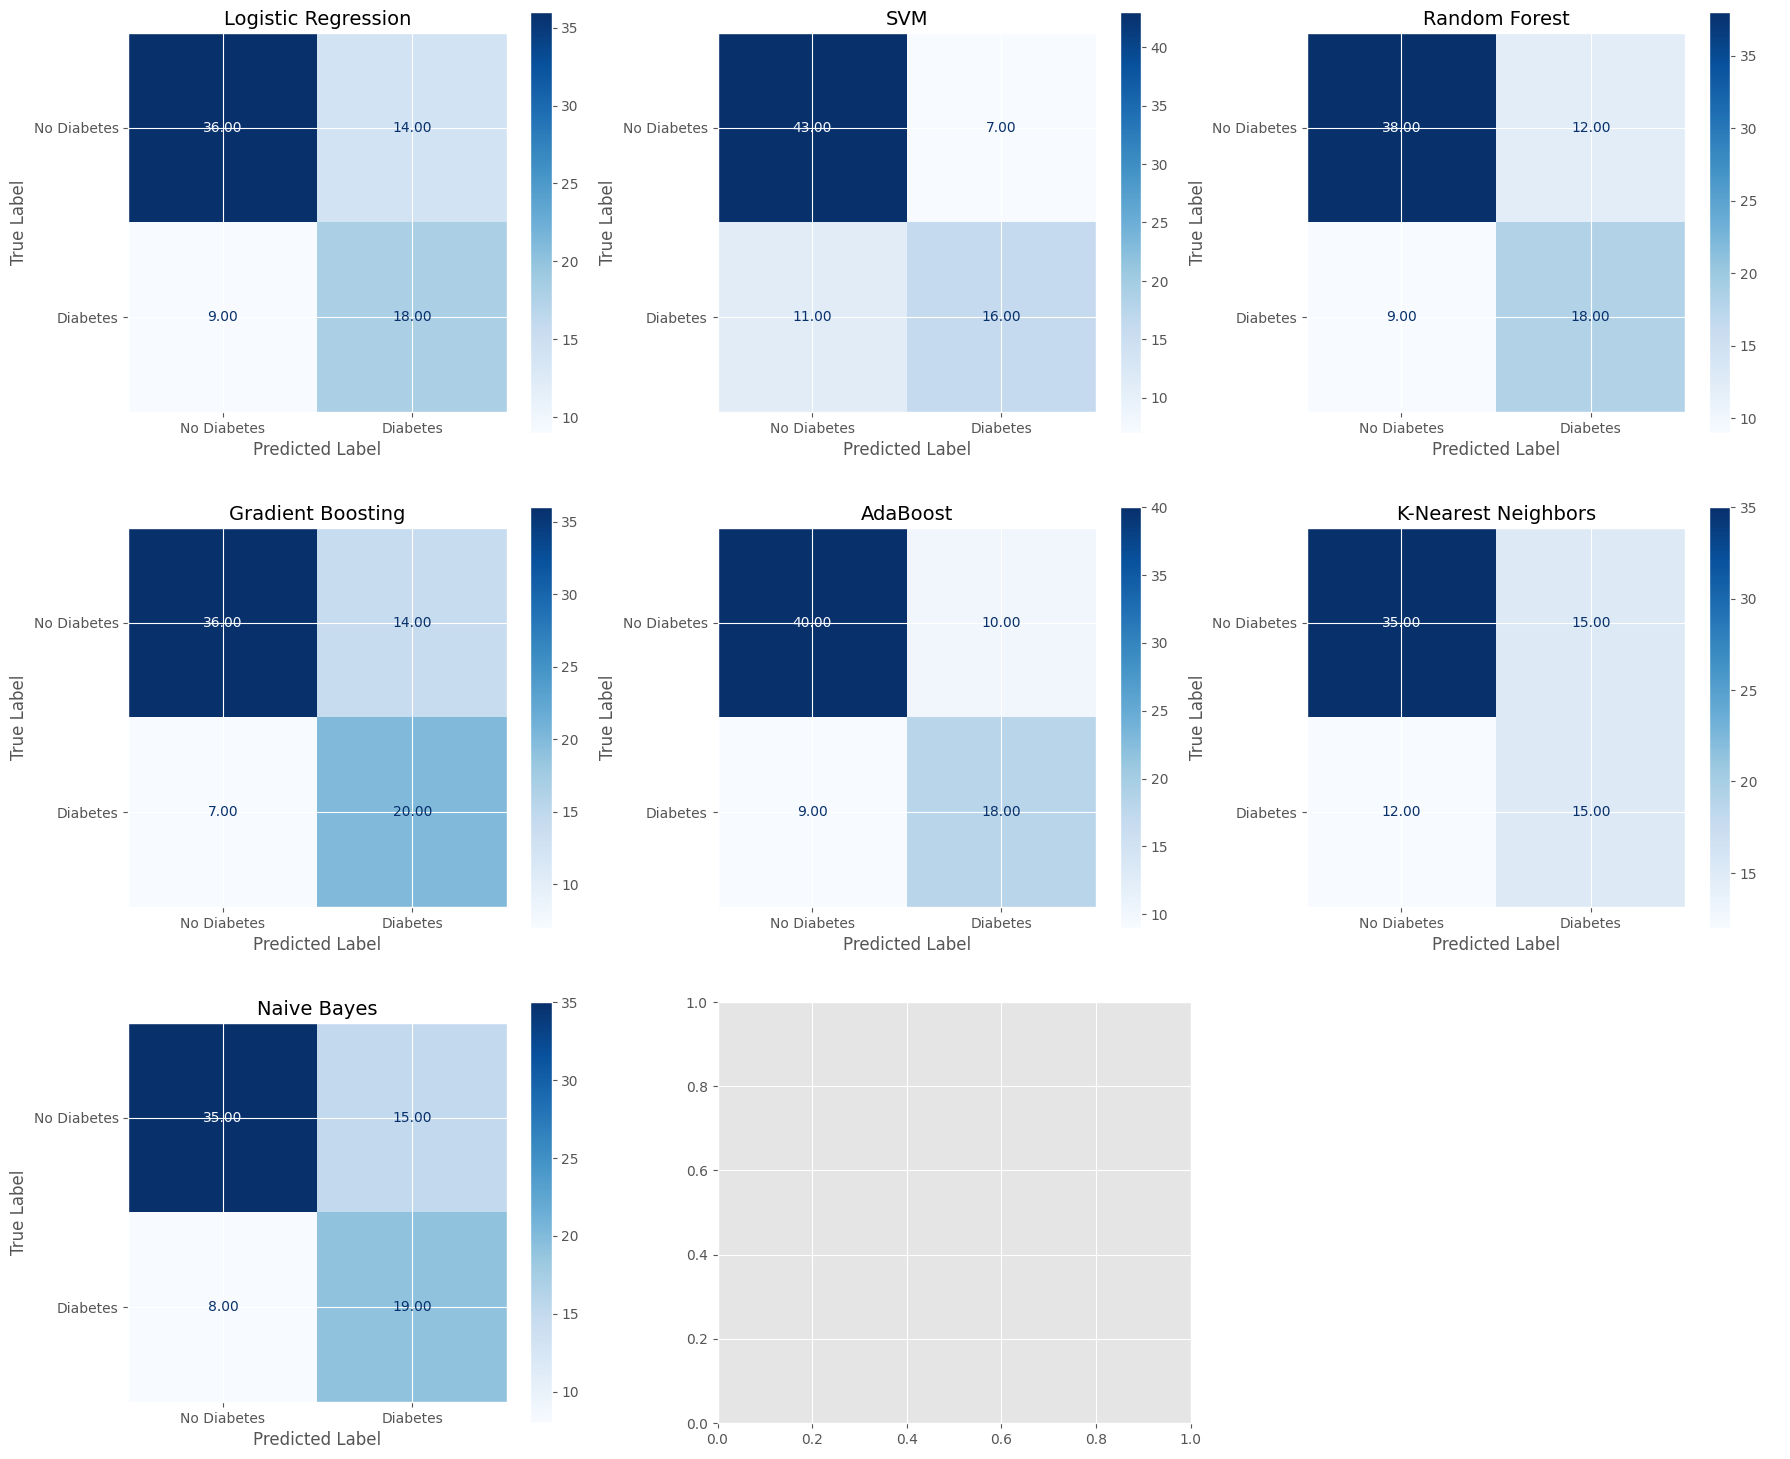

In [104]:

# Set up the figure
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot confusion matrices for all models
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    
    ax = axes[i // 3, i % 3]
    disp.plot(ax=ax, cmap='Blues', colorbar=True, values_format='.2f')
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide the empty subplot in the 3x3 grid
axes[2, 2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
